In [62]:
import pandas as pd

In [63]:
# read data
reviews_df = pd.read_csv("Crowne_Plaza_New_Delhi_Mayur_Vihar_Noida-New_Delhi_National_Capital_Territory_of_Delhi__en.csv")

In [64]:
reviews_df.head()

,review_body,review_date
0,Buffet spread dinner experience at infinity cr...,"May 7, 2019"
1,Exceptional personalized service is given by M...,"May 6, 2019"
2,Frequently stay at the hotel due to work requi...,"May 5, 2019"
3,Stayed here for 2 nights with my wife and kid....,"May 4, 2019"
4,"As a crystal club member, I stayed at Crowne p...","April 30, 2019"


In [65]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_body"] = reviews_df["review_body"].apply(clean_text)
reviews_df.head()

,review_body,review_date
0,buffet spread dinner experience infinity crown...,"May 7, 2019"
1,exceptional personalized service give manager ...,"May 6, 2019"
2,frequently stay hotel due work requirement exe...,"May 5, 2019"
3,stay night wife kid first thing caught attenti...,"May 4, 2019"
4,crystal club member stay crowne plaza mayur vi...,"April 30, 2019"


In [66]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()


#nlp = spacy.load('en')

reviews_df.review_body = reviews_df.review_body.str.lower()

aspect_terms = []
for review_body in nlp.pipe(reviews_df.review_body):
    chunks = [(chunk.root.text) for chunk in review_body.noun_chunks if chunk.root.pos_ == 'NOUN']
    aspect_terms.append(' '.join(chunks))
reviews_df['aspect_terms'] = aspect_terms
reviews_df.head(10)

,review_body,review_date,aspect_terms
0,buffet spread dinner experience infinity crown...,"May 7, 2019",starter option space
1,exceptional personalized service give manager ...,"May 6, 2019",manager world place breakfast brunch
2,frequently stay hotel due work requirement exe...,"May 5, 2019",sumit restaurant care service
3,stay night wife kid first thing caught attenti...,"May 4, 2019",thing service spread site website premium flaw...
4,crystal club member stay crowne plaza mayur vi...,"April 30, 2019",member family room rate tax team reservation f...
5,first time stay crowne plaza mayur vihar great...,"April 29, 2019",time experience train job experience
6,crown plaza wonderful host great experience fa...,"April 29, 2019",host tension event deliver coordinator query
7,place almost amazing step inside feel like cos...,"April 28, 2019",step
8,mr.dinesh always give good smile memory india ...,"April 28, 2019",people achahae food
9,everything stay nice check process akash reall...,"April 26, 2019",akash name amount experience suite greet show ...


In [67]:
sentiment_terms = []
for review_body in nlp.pipe(reviews_df.review_body):
        if review_body.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review_body if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')  
reviews_df['sentiment_terms'] = sentiment_terms
reviews_df.head(10)

,review_body,review_date,aspect_terms,sentiment_terms
0,buffet spread dinner experience infinity crown...,"May 7, 2019",starter option space,wide improve soft strange pudde sit place weir...
1,exceptional personalized service give manager ...,"May 6, 2019",manager world place breakfast brunch,exceptional travel feel miss
2,frequently stay hotel due work requirement exe...,"May 5, 2019",sumit restaurant care service,stay executive late
3,stay night wife kid first thing caught attenti...,"May 4, 2019",thing service spread site website premium flaw...,stay catch outstanding right friendly wide ind...
4,crystal club member stay crowne plaza mayur vi...,"April 30, 2019",member family room rate tax team reservation f...,book complimentary check quick smooth spacious...
5,first time stay crowne plaza mayur vihar great...,"April 29, 2019",time experience train job experience,stay great stay awesome dedicated overall great
6,crown plaza wonderful host great experience fa...,"April 29, 2019",host tension event deliver coordinator query,great free promise initially.nishant great wis...
7,place almost amazing step inside feel like cos...,"April 28, 2019",step,place amazing feel execute fabulous awesome ex...
8,mr.dinesh always give good smile memory india ...,"April 28, 2019",people achahae food,good enjoy find help.beatiful authentic good
9,everything stay nice check process akash reall...,"April 26, 2019",akash name amount experience suite greet show ...,stay nice remember professional think overall ...


In [68]:
from textblob import TextBlob
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#Create two new Columns
reviews_df['Subjectivity_review']=reviews_df['review_body'].apply(getSubjectivity)
reviews_df['Subjectivity_aspect']=reviews_df['aspect_terms'].apply(getSubjectivity)
reviews_df['Subjectivity_sentiments']=reviews_df['sentiment_terms'].apply(getSubjectivity)
reviews_df['Polarity_review']=reviews_df['review_body'].apply(getPolarity)
reviews_df['Polarity_aspect']=reviews_df['aspect_terms'].apply(getPolarity)
reviews_df['Polarity_sentiment']=reviews_df['sentiment_terms'].apply(getPolarity)
reviews_df.head()

,review_body,review_date,aspect_terms,sentiment_terms,Subjectivity_review,Subjectivity_aspect,Subjectivity_sentiments,Polarity_review,Polarity_aspect,Polarity_sentiment
0,buffet spread dinner experience infinity crown...,"May 7, 2019",starter option space,wide improve soft strange pudde sit place weir...,0.486111,0.0,0.514286,0.105556,0.0,0.175000
1,exceptional personalized service give manager ...,"May 6, 2019",manager world place breakfast brunch,exceptional travel feel miss,1.000000,0.0,1.000000,0.666667,0.0,0.666667
2,frequently stay hotel due work requirement exe...,"May 5, 2019",sumit restaurant care service,stay executive late,0.425000,0.0,0.600000,-0.108333,0.0,-0.300000
3,stay night wife kid first thing caught attenti...,"May 4, 2019",thing service spread site website premium flaw...,stay catch outstanding right friendly wide ind...,0.518254,1.0,0.572619,0.325893,1.0,0.243452
4,crystal club member stay crowne plaza mayur vi...,"April 30, 2019",member family room rate tax team reservation f...,book complimentary check quick smooth spacious...,0.541610,0.0,0.542577,0.313265,0.0,0.325210


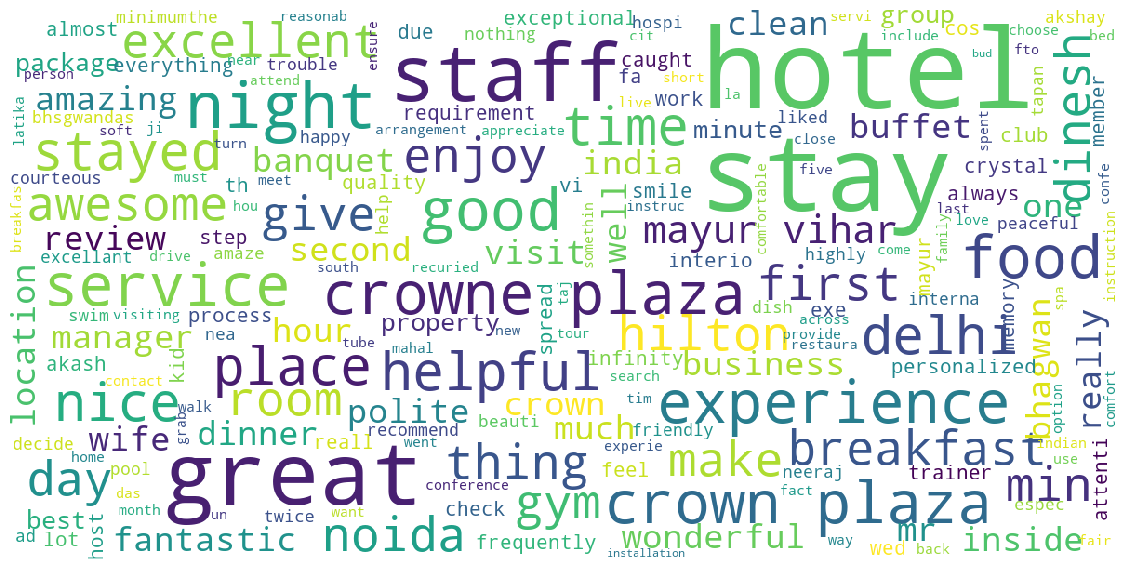

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review_body"])

In [70]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
reviews_df['Analysis']=reviews_df['Polarity_review'].apply(getAnalysis)
reviews_df.head(10)

,review_body,review_date,aspect_terms,sentiment_terms,Subjectivity_review,Subjectivity_aspect,Subjectivity_sentiments,Polarity_review,Polarity_aspect,Polarity_sentiment,Analysis
0,buffet spread dinner experience infinity crown...,"May 7, 2019",starter option space,wide improve soft strange pudde sit place weir...,0.486111,0.0,0.514286,0.105556,0.0,0.175000,Positive
1,exceptional personalized service give manager ...,"May 6, 2019",manager world place breakfast brunch,exceptional travel feel miss,1.000000,0.0,1.000000,0.666667,0.0,0.666667,Positive
2,frequently stay hotel due work requirement exe...,"May 5, 2019",sumit restaurant care service,stay executive late,0.425000,0.0,0.600000,-0.108333,0.0,-0.300000,Negative
3,stay night wife kid first thing caught attenti...,"May 4, 2019",thing service spread site website premium flaw...,stay catch outstanding right friendly wide ind...,0.518254,1.0,0.572619,0.325893,1.0,0.243452,Positive
4,crystal club member stay crowne plaza mayur vi...,"April 30, 2019",member family room rate tax team reservation f...,book complimentary check quick smooth spacious...,0.541610,0.0,0.542577,0.313265,0.0,0.325210,Positive
5,first time stay crowne plaza mayur vihar great...,"April 29, 2019",time experience train job experience,stay great stay awesome dedicated overall great,0.566667,0.0,0.625000,0.570000,0.0,0.650000,Positive
6,crown plaza wonderful host great experience fa...,"April 29, 2019",host tension event deliver coordinator query,great free promise initially.nishant great wis...,0.725000,0.0,0.730000,0.800000,0.0,0.700000,Positive
7,place almost amazing step inside feel like cos...,"April 28, 2019",step,place amazing feel execute fabulous awesome ex...,0.771429,0.0,0.975000,0.578571,0.0,0.700000,Positive
8,mr.dinesh always give good smile memory india ...,"April 28, 2019",people achahae food,good enjoy find help.beatiful authentic good,0.483333,0.0,0.612500,0.433333,0.0,0.575000,Positive
9,everything stay nice check process akash reall...,"April 26, 2019",akash name amount experience suite greet show ...,stay nice remember professional think overall ...,0.621429,0.0,0.678125,0.459524,0.0,0.503125,Positive


In [72]:
# Printing positive reviews 
print('Printing positive reviews:\n')
j=1
sortedDF = reviews_df.sort_values(by=['Polarity_review']) #Sort the reviews
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['review_body'][i])
    print()
    j= j+1


Printing positive reviews:

1) buffet spread dinner experience infinity crown plaza average even though there’s quite wide choice food starter could improve along soft drink option probably it’s due lack space strange arrangement salad pudding sit place weird arrangement good atmosphere friendly staff food quality good

2) exceptional personalized service give manager mr ratan always travel world one place feel home away home.wholesome breakfast rather call brunch one must miss

3) stay night wife kid first thing caught attention hotel service outstanding everyone right security gate front office restaurant friendly care lovely breakfast buffet wide variety indian continental oriental spread let pool maintenance update book site even website see many hotel pay premium expect flawless apart really enjoy stay definitely back thanks entire team

4) crystal club member stay crowne plaza mayur vihar delhi one night family we had booked two room one room complimentary rate plus tax mr gaurav

In [73]:
# Printing negative reviews  
print('Printing negative reviews:\n')
j=1
sortedDF = reviews_df.sort_values(by=['Polarity_review'],ascending=False) #Sort the reviews
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['review_body'][i])
    print()
    j=j+1

Printing negative reviews:

1) frequently stay hotel due work requirement executive chef tarun chef khan along duty incharge sumit infinity restaurant always take care late hour food requirementsexceptional personalise service

2) i've return lunch infinity crowne plaza look advice visit place here's mine don't.we brother's birthday celebration order individual dish along non alcoholic drink two order cream tomato soup need soup stale tomato puree touch cream grainy tinge staleness lemonade taste lime cordial fresh lemons.the bad ask feedback give opinion refuse accept say possible.i obviously go back course suggest go either discount voucher place stay unused.also want point though claim accessible hotel brother wheelchair tough time ramp enter premise table design inconveniently

3) disappointed service hotel book two night initially time check clearly told need decide moment whether stay one night two night tell give time long day let know time attendant adamant inform time staff ru

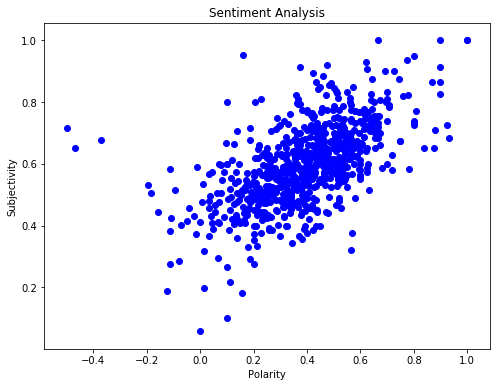

In [75]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0,reviews_df.shape[0]):
 plt.scatter(reviews_df["Polarity_review"][i], reviews_df["Subjectivity_review"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [76]:
# Print the percentage of positive reviews
previews = reviews_df[reviews_df.Analysis == 'Positive']
previews = previews['review_body']
previews

round( (previews.shape[0] / reviews_df.shape[0]) * 100 , 1)


97.3

In [77]:
# Print the percentage of negative reviews
nreviews = reviews_df[reviews_df.Analysis == 'Negative']
nreviews = nreviews['review_body']
nreviews

round( (nreviews.shape[0] / reviews_df.shape[0]) * 100 , 1)

2.6

In [78]:
neureviews=reviews_df[reviews_df.Analysis == 'Neutral']
neureviews=neureviews['review_body']
neureviews

round( (neureviews.shape[0] / reviews_df.shape[0]) * 100 , 1)


0.1

In [79]:
Accuracy=(len(previews)+len(nreviews)+len(neureviews))/len(reviews_df)*100
Accuracy

100.0

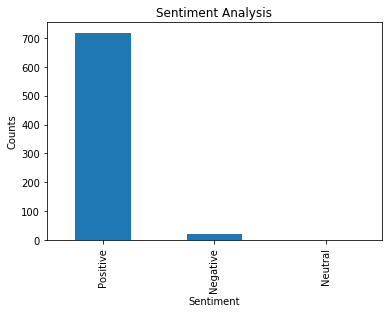

In [80]:
# Show the value counts
reviews_df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(reviews_df.review_body)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [114]:
len(cvector.get_feature_names())

31254

In [118]:
neg_matrix = cvector.transform(reviews_df[reviews_df.Analysis == 'Negative'].review_body)
neu_matrix = cvector.transform(reviews_df[reviews_df.Analysis == 'Neutral'].review_body)
pos_matrix = cvector.transform(reviews_df[reviews_df.Analysis == 'Positive'].review_body)

In [120]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [132]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
hotel,35
stay,16
food,13
staff,13
room,13


In [133]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head()

,neutral
Terms,
dinner,1
choice,1
one,1
hour,1
room,1


In [134]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
hotel,942
room,661
good,624
stay,533
staff,524


In [157]:
term_freq_df = pd.concat([neg_tf_df,neu_words_tf_df,pos_words_tf_df],axis=1,sort=False)
term_freq_df.head()

,negative,neutral,positive
hotel,35,0,942
stay,16,0,533
food,13,0,361
staff,13,0,524
room,13,1,661


In [158]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['neutral'] +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,neutral,positive,total
hotel,35,0,942,977
room,13,1,661,675
good,7,0,624,631
stay,16,0,533,549
staff,13,0,524,537
service,12,0,430,442
food,13,0,361,374
great,0,0,358,358
make,5,0,287,292
well,4,0,284,288


Text(0.5, 1.0, 'Top 500 phrases in hotel reviews')

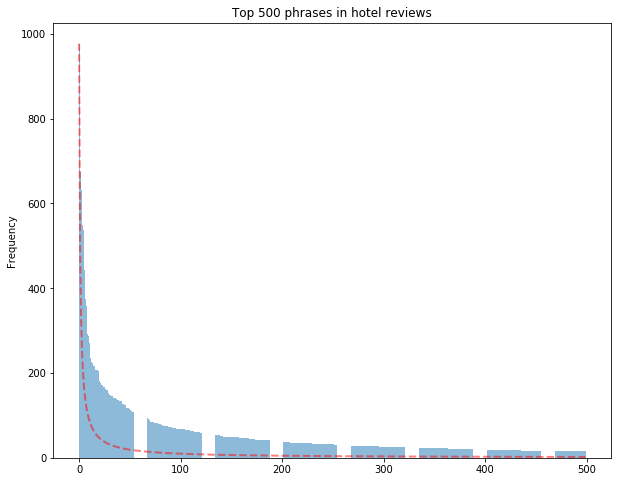

In [159]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in hotel reviews')

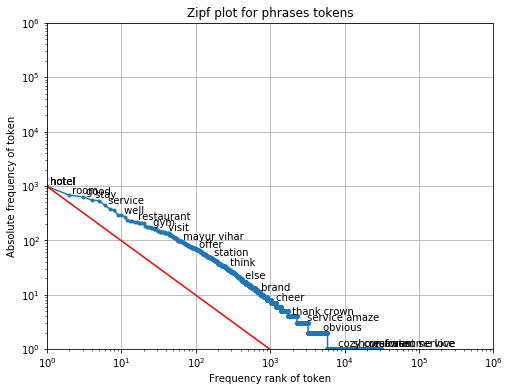

In [160]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 50 tokens in negative Hotel reviews')

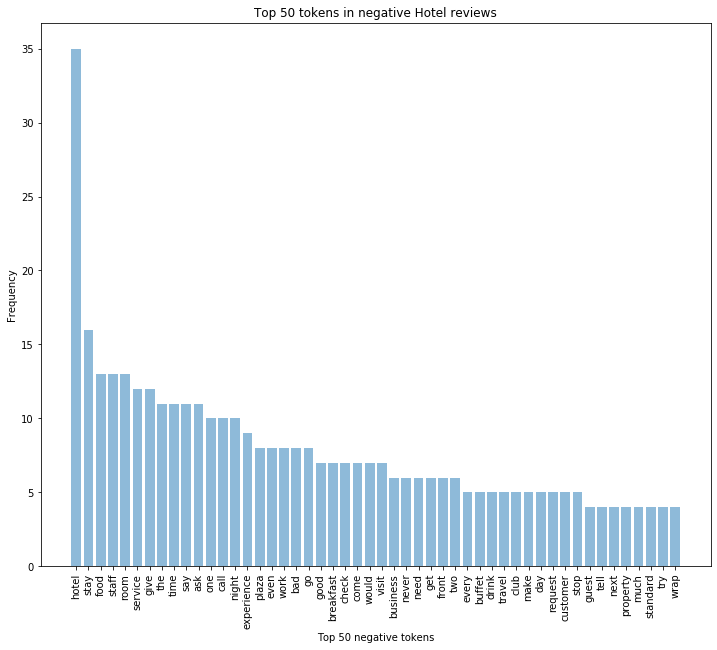

In [162]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative Hotel reviews')

Text(0.5, 1.0, 'Top 50 tokens in positive Hotel reviews')

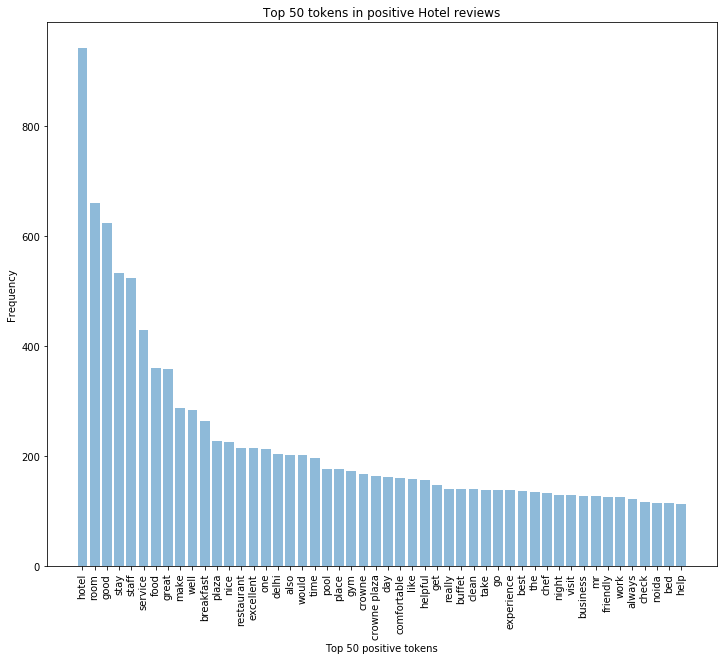

In [163]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive Hotel reviews')